# Titanic Project

**Goal** is to predict if passenfer will survive or not the Titanic accident

We have three datasets

### Data Dictionary
`Survived` : Survival, 0 = No, 1 = Yes

`Pclass` : Ticket class, 1 = 1st, 2 = 2nd, 3 = 3rd

`Sex` : Sex

`Age` : Age in years

`SibSp` : Number of siblings / spouses aboard the Titanic

`Parch` : Number of parents / children aboard the Titanic

`Ticket` : Ticket number

`Fare` : Passenger fare

`Cabin` : Cabin number

`Embarked`: Part of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

Variable Notes

`Pclass`: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

`Age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

`SibSp`: The dataset defines family relations in this way:

- `Sibling` = brother, sister, stepbrother, stepsister

- `Spouse` = husband, wife (mistresses and fiancés were ignored)

`Parch`: The dataset defines family relations in this way Parent = mother, father Child = daughter, son, stepdaughter, stepson

Some children travelled only with a nanny, therefore parch=0 for them.

*Source: Instructions*

## General Overview 

1. Understand the shape of the data 

2. Data Cleaning 

3. Data Exploration

4. Feature Enginerring

5. Data Preprocessing for Model

6. Basic Model Buiilding 

7. Model Tuning 

8. Ensemble Model Building 

9. Results




In [12]:
import numpy as np
import pandas as pd
import re
# import calendar

import seaborn as sns
import matplotlib.style as style


import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [13]:
# grid: rgb(240,240,240)
# background: rgb(200,200,200)
style.use('fivethirtyeight')

## Load Datasets

In [15]:
gender_df = pd.read_csv('data/gender_submission.csv')
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

## 1. Understanding the shape of the data

In [16]:
def getting_to_know(df, question=None):
  '''Returns shape and columns. More info if "y" parameter is included'''
  display(df.shape)
  display(df.columns)
  if question == 'y':
      display(df.head())
      display(df.tail())
  print('--------------------------END--------------------------------')


getting_to_know(train_df, 'y')
getting_to_know(test_df , 'y')

(891, 12)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


--------------------------END--------------------------------


(418, 11)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


--------------------------END--------------------------------


### Project Planning

Make a rough outline of the project

- Understand nature of the data  using `.describe()`, `.info()`

- Value counts on some features of interest

- Correlation between some feature metrics

- Explore interesting subjects
  - Wealthy vs poor survival
  - Lcation by cabin
  - Age scatterplot

- Feature engineering

- Preprocess data or use some other transformer
  - k fold cross validation

- Model Baseline

- Model comparison with CV on Ensemble


In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- We see less data in `age`, `Cabin`, and `Embarked`. Prove it.

In [19]:
# Missing values
def missing_values_func(df):
    """
    @author: Cristobal Zamorano Astudillo
    
    Personalize Missing Data Function
    
    Paramaters
    ----------
    df : DataFrame of interest
    
    Returns
    -------
    A string with counting all the features of the input DataFrame. If some values are missing, then 
    function will return a DataFrame with the following:
    - Index as the features with the missing values
    - A `Missing Values Count` Feature that tells the exact number of rows that has a misssing value in that feature index.
    - A `% of Total Values` that tells how much are the missing values of that feature with respect to the other missing values.
    """
    
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values Count', 1 : '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)


    # Returns
    if mis_val_table_ren_columns.empty:
        return f'Your selected dataframe has  {df.shape[1]} features. There are  {mis_val_table_ren_columns.shape[0]} features that have missing values.'
    else:
        display(mis_val_table_ren_columns.style.background_gradient(cmap='Reds'))
        return f'Your selected dataframe has  {df.shape[1]} features. There are  {mis_val_table_ren_columns.shape[0]} features that have missing values.'
        
missing_values_func(train_df)

,Missing Values Count,% of Total Values
Cabin,687,77.100000
Age,177,19.900000
Embarked,2,0.200000


'Your selected dataframe has  12 features. There are  3 features that have missing values.'

Certainly missing 687 values of the `Cabin` feature present us a problem to deal with missing values. If we decide to drop those missing rows then we would lose 77% of the data. A similar story happens witht he 20% missing values of the `Age` feature.


Divide data into categorical and numerical features and store them in variables:

In [20]:
# Check for NON Categorical features
non_categorical_feature_mask = train_df.dtypes!=object
# Filter non categorical columns using mask and turn it into a list
non_categorical_features = train_df.columns[non_categorical_feature_mask].tolist()
non_categorical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [21]:
categorical_feature_mask = train_df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train_df.columns[categorical_feature_mask].tolist()
categorical_cols


['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

**Numerical data**
- Make Histograms to see distributions
- Pivot it to see the survival rate 

**Categorical data**
- Make bar chart to see different features
- Pivot it to see the survival rate 

Make a correlation matrix using a covariance matrix to see if there is any specific correlation among features in the trainign dataset. Since we know that 20% of the `Age` feature are missing, we'll drop those rows for this purpose only.

“Covariance” indicates the direction of the linear relationship between variables. “Correlation” on the other hand measures both the strength and direction of the linear relationship between two variables. Correlation is a function of the covariance. What sets them apart is the fact that correlation values are standardized whereas, covariance values are not

In [36]:
numerical_features_df = train_df[non_categorical_features]
display(numerical_features_df.shape)
numerical_features_df.dropna(inplace=True)
numerical_features_df.shape

(891, 7)

/Users/cristobalza/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(714, 7)

In [37]:
# Standarize the dataframe
mean_numerical_features = np.mean(numerical_features_df, axis=0)
sd_numerical_features = np.std(numerical_features_df, axis = 0)
numerical_features_df_standarized = (numerical_features_df - mean_numerical_features) / sd_numerical_features 

numerical_features_df_standarized.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.728532,-0.82702,0.911232,-0.530377,0.524570,-0.505895,-0.518978
1,-1.724670,1.20916,-1.476364,0.571831,0.524570,-0.505895,0.691897
2,-1.720808,1.20916,0.911232,-0.254825,-0.551703,-0.505895,-0.506214
3,-1.716946,1.20916,-1.476364,0.365167,0.524570,-0.505895,0.348049
4,-1.713084,-0.82702,0.911232,0.365167,-0.551703,-0.505895,-0.503850


$$\Sigma=\frac{1}{n-1}\left((\mathbf{X}-\overline{\mathbf{x}})^{T}(\mathbf{X}-\overline{\mathbf{x}})\right)$$

In [38]:
# Compute Eigenvectors and Eigenvalues
mean_vec = np.mean(numerical_features_df_standarized, axis=0)
cov_mat = (numerical_features_df_standarized - mean_numerical_features).T.dot((numerical_features_df_standarized - mean_numerical_features)) / (numerical_features_df_standarized.shape[0]-1)
print(f'Covariance matrix \n' ,cov_mat.shape,'\nis a square matrix')
cov_mat

Covariance matrix 
 (7, 7) 
is a square matrix


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,201509.605015,182.482346,1004.714202,13341.230437,230.185711,193.765997,15585.194040
Survived,182.482346,1.166602,0.549578,12.002256,0.191110,0.268901,14.379938
Pclass,1004.714202,0.549578,6.011222,66.151281,1.215491,0.991921,77.154912
Age,13341.230437,12.002256,66.151281,884.276071,14.936590,12.639968,1031.937811
SibSp,230.185711,0.191110,1.215491,14.936590,1.264535,0.605792,17.948049
Parch,193.765997,0.268901,0.991921,12.639968,0.605792,1.187746,15.192658
Fare,15585.194040,14.379938,77.154912,1031.937811,17.948049,15.192658,1206.398936


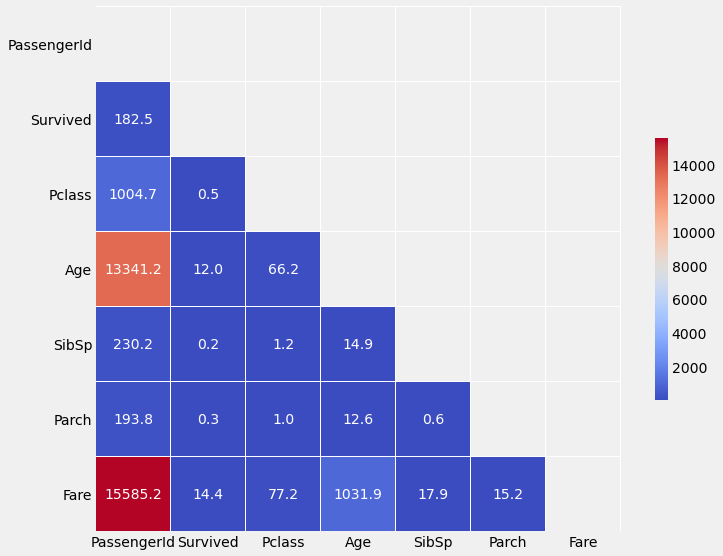

In [61]:
# ax = sns.heatmap(cov_mat
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov_mat, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(240, 10, n=7, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cov_mat, mask=mask, cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.1f');

In [53]:
numerical_features_df['SibSp'].value_counts()

0    471
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64